Q. What is the difference between Correlation and Causation?

Ans. 
Demographic Parity
Equal Opportunity
Equalised Odds

Disparate impact remover
Transformation using reweighting


In [9]:
import pandas as pd

Read data creditworthiness.csv

In [10]:
data = pd.read_csv('creditworthiness.csv')
pd.set_option('display.max_columns', None)

To understand the data plot
The first 10 datasets and all column names

In [11]:
display(data.head(10))

,ID,CC_LIMIT_CAT,EDUCATION,MARITAL_STATUS,GENDER,AGE_GROUP,pay_status_1,pay_status_2,pay_status_3,pay_status_4,pay_status_5,pay_status_6,paid_pct_1,paid_pct_2,paid_pct_3,paid_pct_4,paid_pct_5,paid_pct_6,bill1_over_limit,IS_DEFAULT,_AGE,_spend,_tpm,_ppm,_RETAIL,_URBAN,_RURAL,_PREMIUM,_TREATMENT,_LTV,_CC_LIMIT,_risk_score
0,1,0,2,2,2,0,2,2,-1,-1,-2,-2,0.000000,0.222115,0.000000,1.000000,1.000000,1.000000,0.195650,1,24,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.000000
1,2,3,2,1,2,1,-1,2,0,0,0,2,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309,0.022350,1,26,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.028792
2,3,2,2,1,2,1,0,0,0,0,0,0,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564,0.324878,0,34,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.166089
3,4,1,2,2,2,1,0,0,0,0,0,0,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844,0.939800,0,37,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.579180
4,5,1,2,2,1,0,-1,0,-1,0,0,0,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492,0.172340,0,57,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.382920
5,6,1,3,1,1,1,0,0,0,0,0,0,0.038820,0.031804,0.011405,0.051562,0.050971,0.039952,1.288000,0,37,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.392380
6,7,7,3,1,1,1,0,0,0,0,0,0,0.149471,0.097082,0.085392,0.037296,0.028468,0.029054,0.735930,0,29,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.966006
7,8,3,2,1,2,0,0,-1,-1,0,0,-1,0.031997,1.581579,0.000000,2.628959,1.000000,2.719577,0.118760,0,23,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-0.001590
8,9,3,1,2,2,1,0,0,2,0,0,0,0.294993,0.000000,0.035679,0.081893,0.084796,0.268889,0.080607,0,28,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.084236
9,10,0,1,1,1,1,-2,-2,-2,-2,-1,-1,1.000000,1.000000,1.000000,1.000000,0.086261,0.000000,0.000000,0,35,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.650350


In [12]:
data.shape

(30000, 32)

Define ‚IS_DEFAULT‘ as target
Split the data into training and test data

In [13]:
from sklearn.model_selection  import train_test_split

X = data.drop(['IS_DEFAULT','ID'],axis=1)
y = data['IS_DEFAULT']


X_test, y_test, X_train, y_train = train_test_split(X,y,test_size=.2,random_state=42)

In [14]:
data.isnull().sum()

ID                  0
CC_LIMIT_CAT        0
EDUCATION           0
MARITAL_STATUS      0
GENDER              0
AGE_GROUP           0
pay_status_1        0
pay_status_2        0
pay_status_3        0
pay_status_4        0
pay_status_5        0
pay_status_6        0
paid_pct_1          0
paid_pct_2          0
paid_pct_3          0
paid_pct_4          0
paid_pct_5          0
paid_pct_6          0
bill1_over_limit    0
IS_DEFAULT          0
_AGE                0
_spend              0
_tpm                0
_ppm                0
_RETAIL             0
_URBAN              0
_RURAL              0
_PREMIUM            0
_TREATMENT          0
_LTV                0
_CC_LIMIT           0
_risk_score         0
dtype: int64

 How many women and how many men repay
the loan late?
Plot the confusion matrix

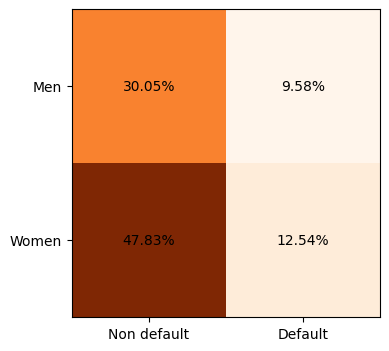

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cf_matrix = confusion_matrix(data.GENDER==2, data.IS_DEFAULT)
# print("cf_matrix\n",type(cf_matrix.sum()))

plt.figure(figsize=(4,4))
plt.xticks([0, 1],['Non default', 'Default'])
plt.yticks([0,1],['Men','Women'])
plt.imshow(cf_matrix, cmap=plt.cm.Oranges)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str( "%.2f%%" %((cf_matrix[i, j]/cf_matrix.sum())*100) ), ha='center', va='center', color='black')
plt.show()

In [16]:
((data.GENDER==1).sum() / len(data.GENDER))*100

39.626666666666665

In [17]:
((data.GENDER==2).sum() / len(data.GENDER))*100

60.373333333333335

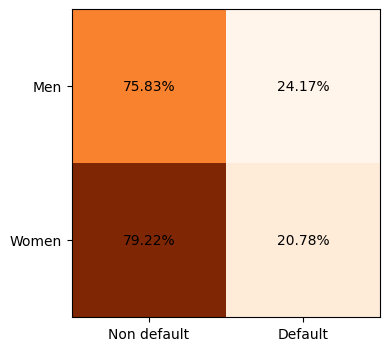

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cf_matrix = confusion_matrix(data.GENDER==2, data.IS_DEFAULT)
# print("cf_matrix\n",type(cf_matrix.sum()))

plt.figure(figsize=(4,4))
plt.xticks([0, 1],['Non default', 'Default'])
plt.yticks([0,1],['Men','Women'])
plt.imshow(cf_matrix, cmap=plt.cm.Oranges)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str( "%.2f%%" %((cf_matrix[i, j]/(data.GENDER==i+1).sum())*100) ), ha='center', va='center', color='black')
plt.show()

We can observe from the above that about 3.39 % more men default 

Define as proteced group ‚GENDER‘

In [19]:
proteced_group = data['GENDER']
X_train, X_test, y_train, y_test, proteced_train, proteced_test = train_test_split(X,y,proteced_group,test_size=.2,random_state=42)

Define privileged and unprivileged groups

from the percentages Female would be privilaged and Male would be unprivilaged

Quantify the model bias
Use the CatBoostClassifier
Give larger weights to positive datasets: 0.9

In [20]:
from catboost import CatBoostClassifier

# model = CatBoostClassifier(class_weights=[.1,.9], random_state=42, learning_rate=.3)
# model.fit(X_train, y_train, cat_features=['GENDER'])

In [21]:
model = CatBoostClassifier(
    class_weights=[.1,.9],
    random_state=42,
    learning_rate=0.1,  
    depth=8,  
    iterations=1000,  
    l2_leaf_reg=5 
)
model.fit(X_train, y_train, cat_features=['GENDER'])

0:	learn: 0.6499097	total: 218ms	remaining: 3m 37s
1:	learn: 0.6146874	total: 241ms	remaining: 2m
2:	learn: 0.5893067	total: 259ms	remaining: 1m 26s
3:	learn: 0.5661624	total: 276ms	remaining: 1m 8s
4:	learn: 0.5503497	total: 292ms	remaining: 58.1s
5:	learn: 0.5369986	total: 310ms	remaining: 51.3s
6:	learn: 0.5271905	total: 326ms	remaining: 46.3s
7:	learn: 0.5188640	total: 342ms	remaining: 42.4s
8:	learn: 0.5113128	total: 359ms	remaining: 39.6s
9:	learn: 0.5059827	total: 376ms	remaining: 37.2s
10:	learn: 0.5007281	total: 392ms	remaining: 35.3s
11:	learn: 0.4962727	total: 410ms	remaining: 33.8s
12:	learn: 0.4931124	total: 430ms	remaining: 32.7s
13:	learn: 0.4900112	total: 448ms	remaining: 31.5s
14:	learn: 0.4869492	total: 466ms	remaining: 30.6s
15:	learn: 0.4845511	total: 482ms	remaining: 29.6s
16:	learn: 0.4825411	total: 498ms	remaining: 28.8s
17:	learn: 0.4806725	total: 514ms	remaining: 28s
18:	learn: 0.4787798	total: 532ms	remaining: 27.4s
19:	learn: 0.4769339	total: 552ms	remaining:

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.80      4687
           1       0.41      0.66      0.51      1313

    accuracy                           0.72      6000
   macro avg       0.65      0.70      0.66      6000
weighted avg       0.78      0.72      0.74      6000



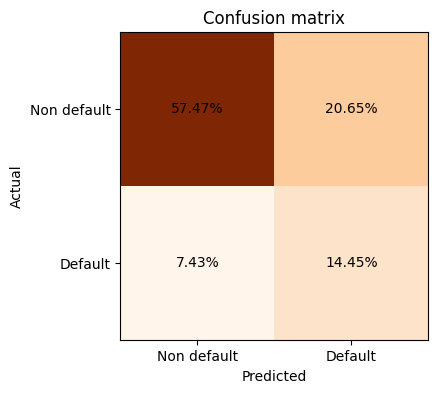

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cf_matrix = confusion_matrix(y_test, y_pred)
# print("cf_matrix\n",type(cf_matrix.sum()))

plt.figure(figsize=(4,4))
plt.xticks([0, 1],['Non default', 'Default'])
plt.yticks([0,1],['Non default', 'Default'])
plt.imshow(cf_matrix, cmap=plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str( "%.2f%%" %((cf_matrix[i, j]/cf_matrix.sum())*100) ), ha='center', va='center', color='black')
plt.show()

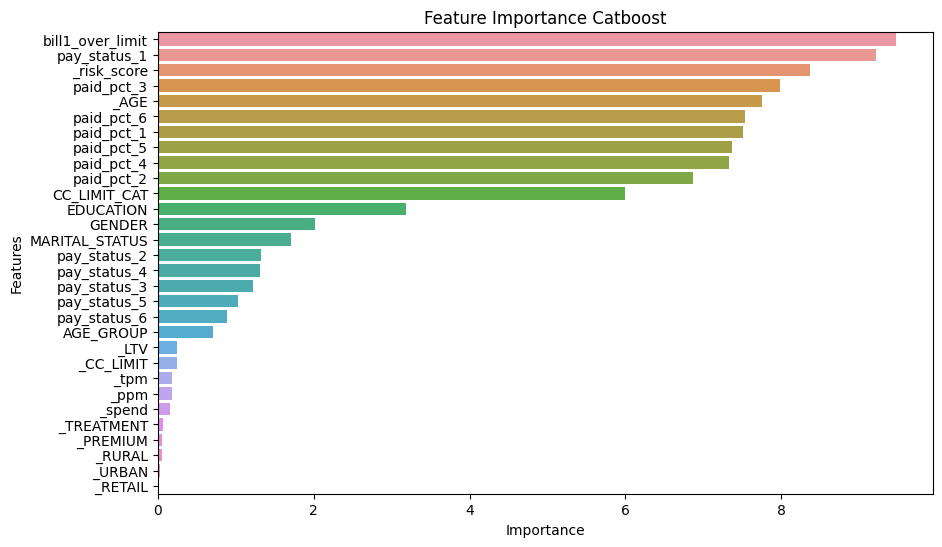

In [25]:
import seaborn as sns

feature_importance = model.get_feature_importance()
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance Catboost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

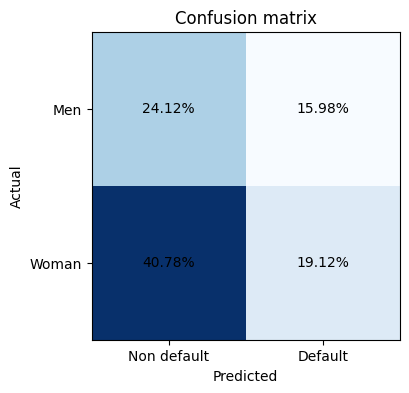

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cf_matrix = confusion_matrix(X_test.GENDER==2, y_pred)
# print("cf_matrix\n",type(cf_matrix.sum()))

plt.figure(figsize=(4,4))
plt.xticks([0, 1],['Non default', 'Default'])
plt.yticks([0,1],['Men', 'Woman'])
plt.imshow(cf_matrix, cmap=plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str( "%.2f%%" %((cf_matrix[i, j]/cf_matrix.sum())*100) ), ha='center', va='center', color='black')
plt.show()

Compare the results of using standard weights
with using your weights

In [27]:
# from catboost import CatBoostClassifier

# model = CatBoostClassifier(random_state=42, learning_rate=.3)
# model.fit(X_train, y_train, cat_features=['GENDER'])

In [28]:
model = CatBoostClassifier(
    random_state=42,
    learning_rate=0.1,
    depth=8,
    iterations=1000,
    l2_leaf_reg=5
)
model.fit(X_train, y_train, cat_features=['GENDER'])

0:	learn: 0.6393751	total: 20.1ms	remaining: 20.1s
1:	learn: 0.5964784	total: 38.9ms	remaining: 19.4s
2:	learn: 0.5637845	total: 57.5ms	remaining: 19.1s
3:	learn: 0.5379571	total: 76.7ms	remaining: 19.1s
4:	learn: 0.5166386	total: 92.3ms	remaining: 18.4s
5:	learn: 0.4997370	total: 107ms	remaining: 17.8s
6:	learn: 0.4868015	total: 122ms	remaining: 17.3s
7:	learn: 0.4771820	total: 136ms	remaining: 16.9s
8:	learn: 0.4685867	total: 152ms	remaining: 16.7s
9:	learn: 0.4610546	total: 163ms	remaining: 16.1s
10:	learn: 0.4549580	total: 177ms	remaining: 15.9s
11:	learn: 0.4493121	total: 192ms	remaining: 15.8s
12:	learn: 0.4451982	total: 208ms	remaining: 15.8s
13:	learn: 0.4415562	total: 223ms	remaining: 15.7s
14:	learn: 0.4383003	total: 239ms	remaining: 15.7s
15:	learn: 0.4357455	total: 263ms	remaining: 16.1s
16:	learn: 0.4333612	total: 291ms	remaining: 16.9s
17:	learn: 0.4316265	total: 310ms	remaining: 16.9s
18:	learn: 0.4297753	total: 325ms	remaining: 16.8s
19:	learn: 0.4285477	total: 340ms	re

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4687
           1       0.64      0.39      0.48      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



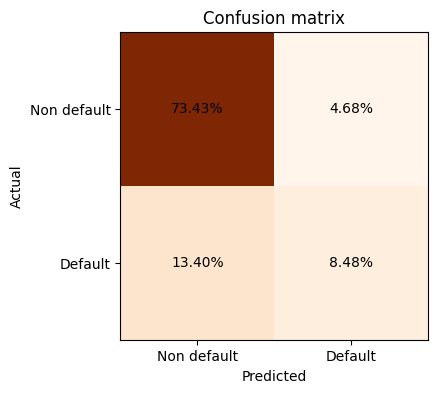

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cf_matrix = confusion_matrix(y_test, y_pred)
# print("cf_matrix\n",type(cf_matrix.sum()))

plt.figure(figsize=(4,4))
plt.xticks([0, 1],['Non default', 'Default'])
plt.yticks([0,1],['Non default', 'Default'])
plt.imshow(cf_matrix, cmap=plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str( "%.2f%%" %((cf_matrix[i, j]/cf_matrix.sum())*100) ), ha='center', va='center', color='black')
plt.show()

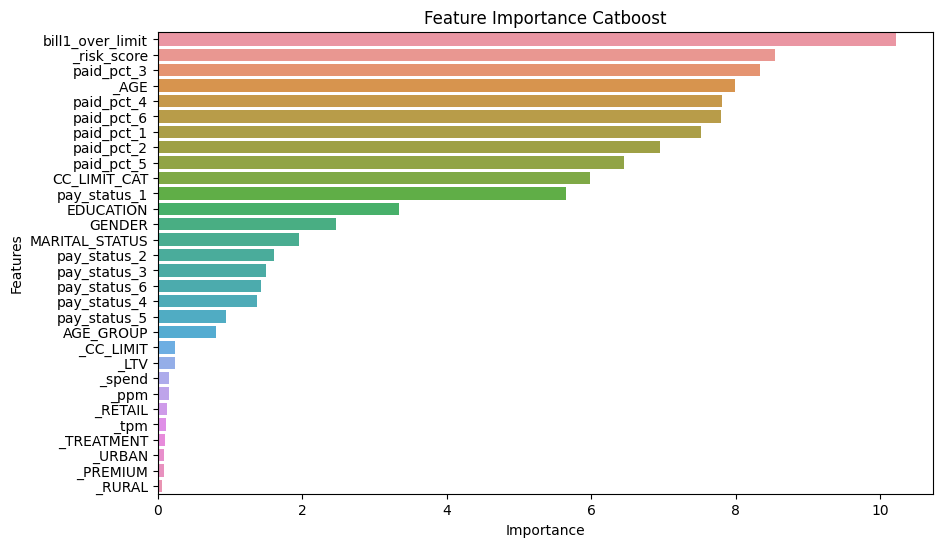

In [32]:
import seaborn as sns

feature_importance = model.get_feature_importance()
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance Catboost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

weighted model has gigher precision for default class

Compare the results of using standard weights
with using your weights

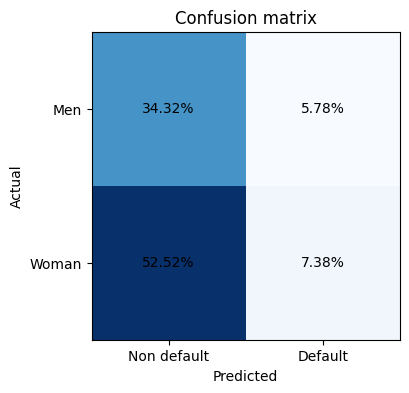

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cf_matrix = confusion_matrix(X_test.GENDER==2, y_pred)
# print("cf_matrix\n",type(cf_matrix.sum()))

plt.figure(figsize=(4,4))
plt.xticks([0, 1],['Non default', 'Default'])
plt.yticks([0,1],['Men', 'Woman'])
plt.imshow(cf_matrix, cmap=plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str( "%.2f%%" %((cf_matrix[i, j]/cf_matrix.sum())*100) ), ha='center', va='center', color='black')
plt.show()

The model doesnt appear to be biased

In [34]:
print("all repayment delays\n",data[data.IS_DEFAULT==1]._TREATMENT.value_counts())

all repayment delays
 -1    6335
 0      96
 2      87
 1      62
 3      56
Name: _TREATMENT, dtype: int64


In [35]:
print("number of women/men\n",data.GENDER.value_counts())
print("number of women/men with repayment delay\n",data[data.IS_DEFAULT==1].GENDER.value_counts())

number of women/men
 2    18112
1    11888
Name: GENDER, dtype: int64
number of women/men with repayment delay
 2    3763
1    2873
Name: GENDER, dtype: int64


In [36]:
print("Percentage of women/men with repayment delay\n",data[data.IS_DEFAULT==1].GENDER.value_counts(),data.GENDER.value_counts())

Percentage of women/men with repayment delay
 2    3763
1    2873
Name: GENDER, dtype: int64 2    18112
1    11888
Name: GENDER, dtype: int64


In [37]:
print("all repayment delays\n",data[data.IS_DEFAULT==1]._TREATMENT.value_counts())
print("number of women/men\n",data.GENDER.value_counts())
print("number of women/men with repayment delay\n",data[data.IS_DEFAULT==1].GENDER.value_counts())
print("Percentage of women/men with repayment delay\n",data[data.IS_DEFAULT==1].GENDER.value_counts()/data.GENDER.value_counts())

all repayment delays
 -1    6335
 0      96
 2      87
 1      62
 3      56
Name: _TREATMENT, dtype: int64
number of women/men
 2    18112
1    11888
Name: GENDER, dtype: int64
number of women/men with repayment delay
 2    3763
1    2873
Name: GENDER, dtype: int64
Percentage of women/men with repayment delay
 2    0.207763
1    0.241672
Name: GENDER, dtype: float64


In [38]:
from aif360.datasets import BinaryLabelDataset

train_ds = BinaryLabelDataset(df=X_train.join(y_train), label_names=['IS_DEFAULT'], protected_attribute_names=['AGE_GROUP', 'GENDER'], favorable_label=0, unfavorable_label=1)
test_ds = BinaryLabelDataset(df=X_test.join(y_test), label_names=['IS_DEFAULT'], protected_attribute_names=['AGE_GROUP', 'GENDER'], favorable_label=0, unfavorable_label=1)

pip install 'aif360[LawSchoolGPA]'


In [39]:
unprivileged_groups = [{"GENDER": 1}]
privileged_groups = [{"GENDER": 2}]

In [40]:
from aif360.metrics import BinaryLabelDatasetMetric

metrics_train_ds = BinaryLabelDatasetMetric(train_ds,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
metrics_test_ds = BinaryLabelDatasetMetric(test_ds,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
print ("Difference in mean outcomes TEST between unprivileged and privileged groups = ",metrics_test_ds.mean_difference())


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


Difference in mean outcomes TEST between unprivileged and privileged groups =  -0.023235594930314685


What are advantages and disadvantages of the bias mitigation methods in

What is the greatest disadvantage of all bias mitigation methods?

Use the method Reweighing to reduce the bias

In [41]:
from aif360.algorithms.preprocessing.reweighing import Reweighing

reweigher = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
reweigher.fit(train_ds)
train_rw_ds = reweigher.transform(train_ds)

In [42]:
display(train_ds)

               instance weights     features                           \
                                                                        
                                CC_LIMIT_CAT EDUCATION MARITAL_STATUS   
instance names                                                          
21753                       1.0          2.0       2.0            1.0   
251                         1.0          0.0       2.0            1.0   
22941                       1.0          4.0       0.0            2.0   
618                         1.0          2.0       3.0            1.0   
17090                       1.0          3.0       2.0            1.0   
...                         ...          ...       ...            ...   
29802                       1.0          1.0       2.0            1.0   
5390                        1.0          5.0       3.0            1.0   
860                         1.0          1.0       3.0            1.0   
15795                       1.0          2.0       

In [43]:
train_rw_ds

               instance weights     features                           \
                                                                        
                                CC_LIMIT_CAT EDUCATION MARITAL_STATUS   
instance names                                                          
21753                  0.981754          2.0       2.0            1.0   
251                    1.029289          0.0       2.0            1.0   
22941                  0.981754          4.0       0.0            2.0   
618                    1.029289          2.0       3.0            1.0   
17090                  0.981754          3.0       2.0            1.0   
...                         ...          ...       ...            ...   
29802                  1.029289          1.0       2.0            1.0   
5390                   0.909221          5.0       3.0            1.0   
860                    1.029289          1.0       3.0            1.0   
15795                  1.069758          2.0       

 Compare the results with and without reweighting

In [44]:
print('Statistical Parity Difference (SPD):\t\t\t%.4f' %metrics_train_ds.statistical_parity_difference())
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %metrics_train_ds.disparate_impact())
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %metrics_train_ds.smoothed_empirical_differential_fairness())

Statistical Parity Difference (SPD):			-0.0366
Disparate Impact (DI):					0.9538
Smoothed Empirical Differential Fairness (SEDF):	0.3601


In [45]:
metrics_train_rw_ds = BinaryLabelDatasetMetric(train_rw_ds,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
print('Reweigher (REW) Statistical Parity Difference (SPD):\t\t\t%.4f' %metrics_train_rw_ds.statistical_parity_difference())
print('REW Disparate Impact (DI):\t\t\t\t\t%.4f' %metrics_train_rw_ds.disparate_impact())
print('REW Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %metrics_train_rw_ds.smoothed_empirical_differential_fairness())

Reweigher (REW) Statistical Parity Difference (SPD):			-0.0000
REW Disparate Impact (DI):					1.0000
REW Smoothed Empirical Differential Fairness (SEDF):	0.2353


In [46]:
model_reweighed = model.fit(X_train, y_train, verbose=False, sample_weight=train_rw_ds.instance_weights)
y_test_cb_pred = model_reweighed.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_test_cb_pred)

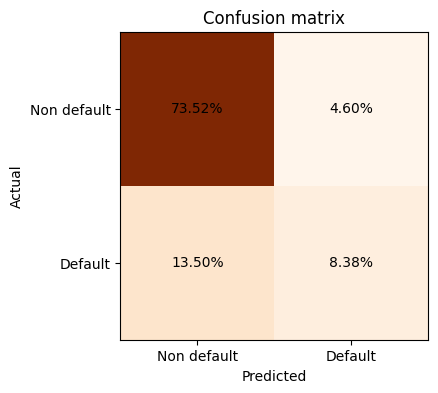

In [47]:
plt.figure(figsize=(4,4))
plt.xticks([0, 1],['Non default', 'Default'])
plt.yticks([0,1],['Non default', 'Default'])
plt.imshow(cf_matrix, cmap=plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str( "%.2f%%" %((cf_matrix[i, j]/cf_matrix.sum())*100) ), ha='center', va='center', color='black')
plt.show()

In [48]:
print(classification_report(y_test, y_test_cb_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.38      0.48      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



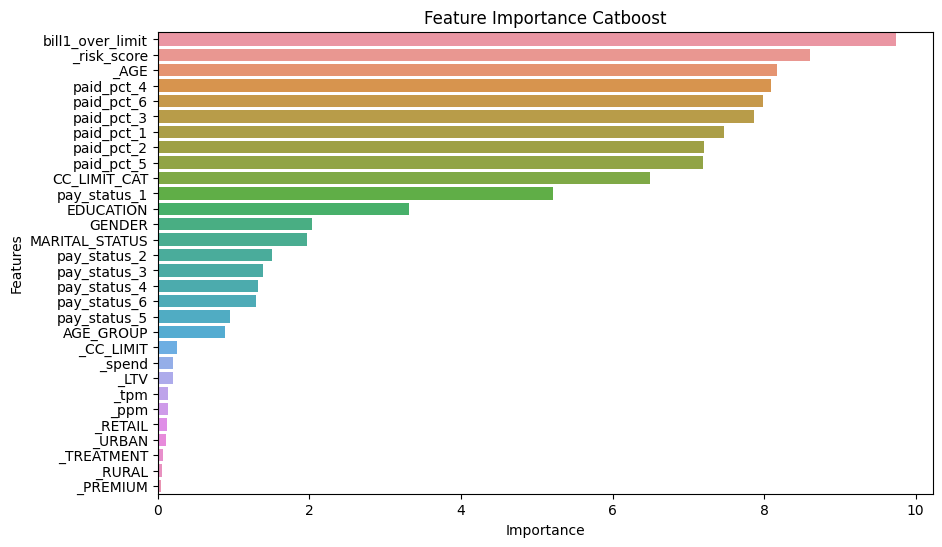

In [49]:
feature_importance = model.get_feature_importance()
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance Catboost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Use the In-Processing method Prejudice
Remover for bias reduction

In [50]:
from aif360.algorithms.inprocessing.prejudice_remover import PrejudiceRemover

log_pr_mdl = PrejudiceRemover(eta=1.0, sensitive_attr='AGE_GROUP', class_attr='IS_DEFAULT')
log_pr_mdl.fit(train_ds)


In [52]:
# train_pred_pr_ds = log_pr_mdl.predict(train_ds)
# test_pred_pr_ds = log_pr_mdl.predict(test_ds)

In [53]:
from aif360.algorithms.inprocessing.gerryfair_classifier import GerryFairClassifier
from sklearn.tree import DecisionTreeRegressor

dt_gf_mdl = GerryFairClassifier(C=100, gamma=.005, fairness_def='FN',max_iters=50, printflag=True,predictor=DecisionTreeRegressor(max_depth=3))
dt_gf_mdl.fit(train_ds, early_termination=True)
train_pred_gf_ds = dt_gf_mdl.predict(train_ds, threshold=False)
test_pred_gf_ds = dt_gf_mdl.predict(test_ds, threshold=False)

iteration: 1, error: 0.17808333333333334, fairness violation: 0.002413762602542431, violated group size: 0.08754166666666667
iteration: 2, error: 0.17808333333333334, fairness violation: 0.002413762602542431, violated group size: 0.08754166666666667
iteration: 3, error: 0.17808333333333334, fairness violation: 0.002413762602542431, violated group size: 0.08754166666666667
iteration: 4, error: 0.17808333333333334, fairness violation: 0.002413762602542431, violated group size: 0.08754166666666667
iteration: 5, error: 0.17808333333333334, fairness violation: 0.002413762602542431, violated group size: 0.08754166666666667


Compare the results to the Pre-Processing mitigation method

In [54]:
print('Statistical Parity Difference (SPD):\t\t\t%.4f' %metrics_train_ds.statistical_parity_difference())
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %metrics_train_ds.disparate_impact())
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %metrics_train_ds.smoothed_empirical_differential_fairness())

Statistical Parity Difference (SPD):			-0.0366
Disparate Impact (DI):					0.9538
Smoothed Empirical Differential Fairness (SEDF):	0.3601


In [55]:
Binary_train_pred_gf_ds = BinaryLabelDatasetMetric(train_pred_gf_ds,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
print('Statistical Parity Difference (SPD):\t\t\t%.4f' %Binary_train_pred_gf_ds.statistical_parity_difference())
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %Binary_train_pred_gf_ds.disparate_impact())
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %Binary_train_pred_gf_ds.smoothed_empirical_differential_fairness())

Statistical Parity Difference (SPD):			-0.0281
Disparate Impact (DI):					0.9683
Smoothed Empirical Differential Fairness (SEDF):	0.4816


 Use the Post-Processing Bias reduction method Equalized odds postprocessing

In [56]:
fitted_cb_mdl = model.fit(X_train, y_train, verbose=False)
y_test_cb_pred = fitted_cb_mdl .predict(X_test)

In [57]:
test_ds = BinaryLabelDataset(df=X_test.join(y_test),label_names=['IS_DEFAULT'],protected_attribute_names=['AGE_GROUP', 'GENDER'],favorable_label=0, unfavorable_label=1)
X_posw = X_test.copy()
X_posw['IS_DEFAULT'] = y_test_cb_pred
y_test_cb_pred = BinaryLabelDataset(df=X_posw,label_names=['IS_DEFAULT'],protected_attribute_names=['AGE_GROUP', 'GENDER'],favorable_label=0, unfavorable_label=1)

In [58]:
from aif360.algorithms.postprocessing.calibrated_eq_odds_postprocessing import CalibratedEqOddsPostprocessing

cpp = CalibratedEqOddsPostprocessing(privileged_groups=privileged_groups,unprivileged_groups=unprivileged_groups,cost_constraint="fpr",seed=42)

In [59]:
cpp = cpp.fit(test_ds, y_test_cb_pred)
test_pred_cpp_ds = cpp.predict(y_test_cb_pred)

Compare the results to the results of your Post Processing method

In [60]:
print('Statistical Parity Difference (SPD):\t\t\t%.4f' %metrics_train_ds.statistical_parity_difference())
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %metrics_train_ds.disparate_impact())
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %metrics_train_ds.smoothed_empirical_differential_fairness())

Statistical Parity Difference (SPD):			-0.0366
Disparate Impact (DI):					0.9538
Smoothed Empirical Differential Fairness (SEDF):	0.3601


In [61]:
Binary_test_pred_cpp_ds = BinaryLabelDatasetMetric(test_pred_cpp_ds,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)

print('Statistical Parity Difference (SPD):\t\t\t%.4f' %Binary_test_pred_cpp_ds.statistical_parity_difference())
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %Binary_test_pred_cpp_ds.disparate_impact())
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %Binary_test_pred_cpp_ds.smoothed_empirical_differential_fairness())

Statistical Parity Difference (SPD):			-0.0171
Disparate Impact (DI):					0.9805
Smoothed Empirical Differential Fairness (SEDF):	0.4330


In [86]:
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_df = pd.DataFrame({'IS_DEFAULT': y_pred_series})


In [88]:
catboost_unodified = BinaryLabelDataset(df=X_test.join(y_pred_df),label_names=['IS_DEFAULT'],protected_attribute_names=['AGE_GROUP', 'GENDER'],favorable_label=0, unfavorable_label=1)
unmodified__catboost_binary = BinaryLabelDatasetMetric(catboost_unodified,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)

print('Statistical Parity Difference (SPD):\t\t\t%.4f' %unmodified__catboost_binary.statistical_parity_difference())
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %unmodified__catboost_binary.disparate_impact())
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %unmodified__catboost_binary.smoothed_empirical_differential_fairness())

Statistical Parity Difference (SPD):			-0.0210
Disparate Impact (DI):					0.9761
Smoothed Empirical Differential Fairness (SEDF):	0.5014
